<a href="https://colab.research.google.com/github/cristinarainich/DDCS/blob/main/thresholds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
import pylab as pl
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import matplotlib.cm as cm

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
working_path = Path('/content/gdrive/MyDrive/KKNV')

In [5]:
!ls /content/gdrive/MyDrive/KKNV

 11a5490b-0e2d-4fd7-b54e-e2ebd0a72df6.zip   Pilot.csv
 CMI					   'Pilot reading task.gsheet'
 comorbidity				    protocols
 data					    tasks
'files sharing.docx'			    Temporal_Frequency_Staircase_V3_gamified_L2R_Ilia.eve
'JC 1.10 AF.pptx'			    thresholds.csv
 old					    thresholds.gsheet


In [6]:
thresholds = pd.read_csv(
    working_path.joinpath('thresholds.csv'),
    index_col=None
)

In [43]:
def create_figures(df):
    # Updated regex to handle cases without spaces around "+-"
  df['LH threshold value'] = df['LH threshold'].str.extract(r'([\d\.]+)').astype(float)
  df['LH threshold SD'] = df['LH threshold'].str.extract(r'\+\- ?([\d\.]+)').astype(float)

  df['RH threshold value'] = df['RH threshold'].str.extract(r'([\d\.]+)').astype(float)
  df['RH threshold SD'] = df['RH threshold'].str.extract(r'\+\- ?([\d\.]+)').astype(float)

  subjects = df.Subject.unique().tolist()
  for sub in subjects:
    subset = df[df['Subject'] == sub]
    terms = subset['Termin'].unique()
    num_terms = len(terms)

    # Adjust width scaling to make graphs smaller along the x-axis
    fig, axes = plt.subplots(1, num_terms, figsize=(3 * num_terms, 5), sharey=True)  # Reduced width per graph

    if num_terms == 1:  # Handle case where there is only one Termin
          axes = [axes]  # Ensure axes is iterable

    bar_width = 0.25  # Set bar width to make them thinner
    bar_gap = 0.05    # Add extra gap between bars to avoid overlap

    for ax, term in zip(axes, terms):
        term_data = subset[subset['Termin'] == term]
        num_runs = len(term_data)
        colors = cm.viridis(np.linspace(0, 1, num_runs))  # Generate a color palette for the runs

        for idx, (index, row) in enumerate(term_data.iterrows()):
            x = ['LH', 'RH']
            y = [row['LH threshold value'], row['RH threshold value']]
            yerr = [row['LH threshold SD'], row['RH threshold SD']]

        # Use bar plot with unique color for each run and thinner bars
        # Offset each run's bars further apart
            bar_positions = np.array([0, 1]) + idx * (bar_width + bar_gap)  # Increase gap between bars

            ax.bar(bar_positions, y, yerr=yerr, capsize=5, color=colors[idx], alpha=0.8, width=bar_width, label=f'Run {row["Run"]}')

      # Customize x-ticks
        ax.set_xticks([0.5, 1.5])  # Middle of the grouped bars
        ax.set_xticklabels(x)

        ax.set_title(f'Termin {term}')
        ax.set_ylabel('Threshold')
        ax.legend(loc='upper right')
        ax.grid(visible=True, alpha=0.3)  # Less visible gridlines
        ax.set_xlabel('Field')

    # Add a title to the whole figure
    fig.suptitle('Thresholds for Subject ' + str(sub), fontsize=16, y=1.02)

# Adjust layout and show the figure
    plt.tight_layout()
    plt.show()





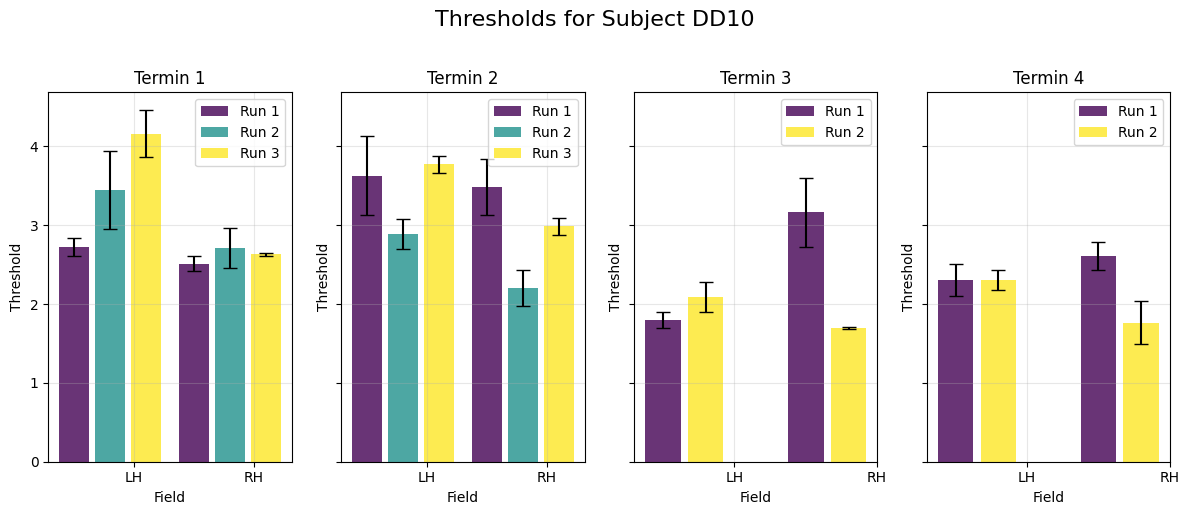

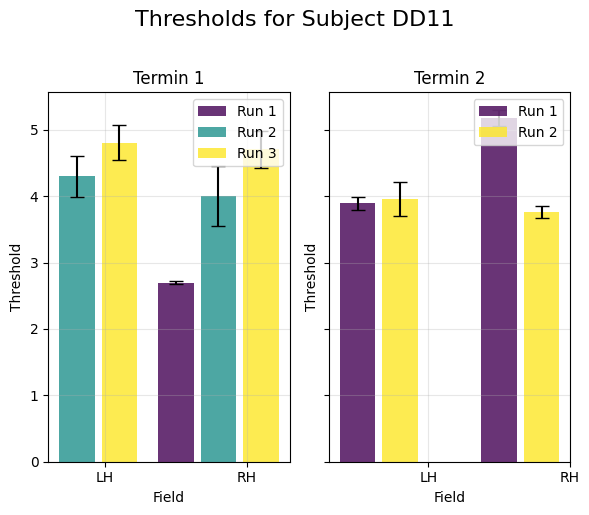

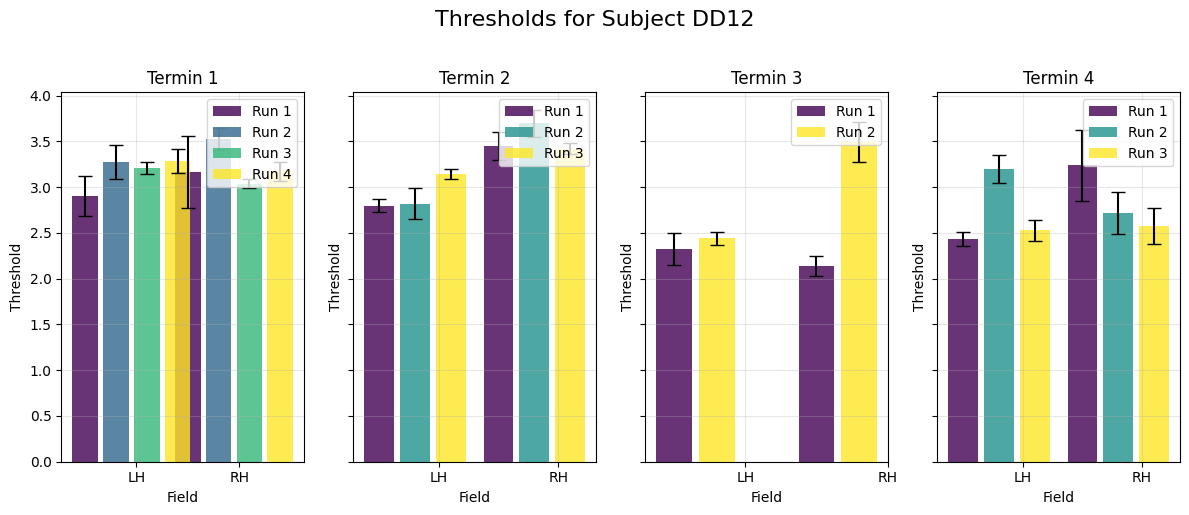

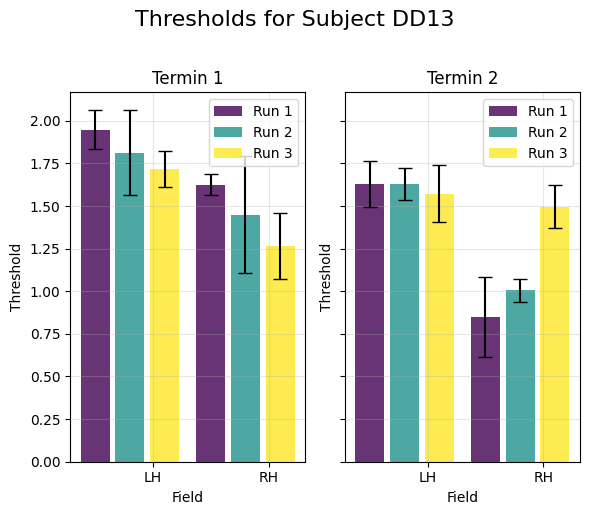

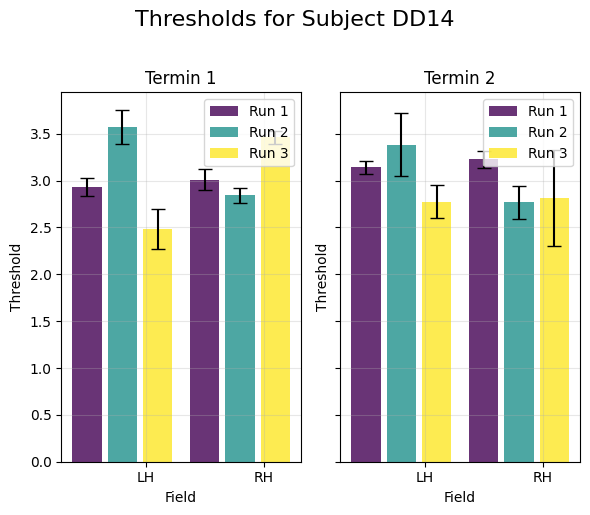

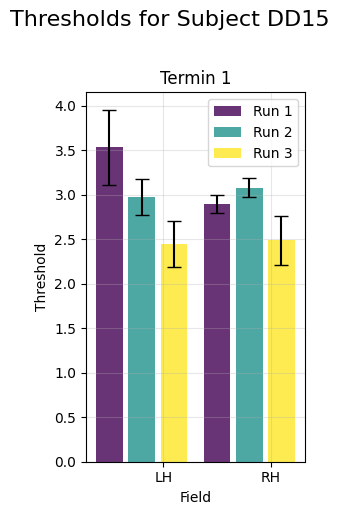

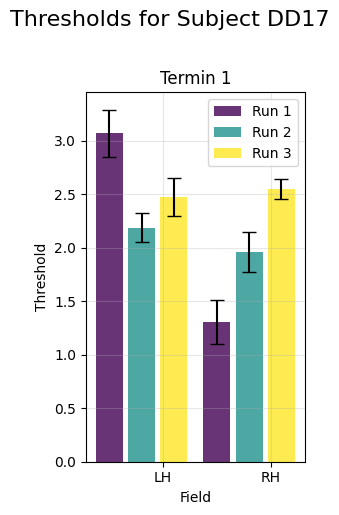

In [44]:
create_figures(thresholds)